In [2]:
import requests
from bs4 import BeautifulSoup
import scipy.io
import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd
import numpy as np
import pickle
from time import sleep
import timeit
import string
import re

#import snips as snp  # my snippets
#snp.prettyplot(matplotlib)  # my aesthetic preferences for plotting
%matplotlib inline


In [3]:
pkl_filename_master = "df_games.pkl"
with open(pkl_filename_master, 'rb') as picklefile: 
    df_games = pickle.load(picklefile)

In [4]:
df_games

,id,name,year_released,geek_rating,average_rating,nrate,pic_url,url,index1,min_players,max_players,description,category,attributes
0,13,Catan,1995,7.123,7.26,68026,//cf.geekdo-images.com/images/pic2419375_mt.jpg,https://boardgamegeek.com/boardgame/13/catan,0,3,4,"In Catan (formerly The Settlers of Catan), pla...",[Negotiation],"[Dice Rolling, Hand Management, Modular Board,..."
1,822,Carcassonne,2000,7.335,7.44,67439,//cf.geekdo-images.com/images/pic2337577_mt.jpg,https://boardgamegeek.com/boardgame/822/carcas...,1,2,5,Carcassonne is a tile-placement game in which ...,"[City Building, Medieval, Territory Building]","[Area Control / Area Influence, Tile Placement]"
2,30549,Pandemic,2008,7.585,7.67,62799,//cf.geekdo-images.com/images/pic1534148_mt.jpg,https://boardgamegeek.com/boardgame/30549/pand...,2,2,4,"In Pandemic, several virulent diseases have br...",[Medical],"[Action Point Allowance System, Co-operative P..."
3,36218,Dominion,2008,7.607,7.7,56192,//cf.geekdo-images.com/images/pic394356_mt.jpg,https://boardgamegeek.com/boardgame/36218/domi...,3,2,4,(from the back of the box:)&#10;&#10;&quot;You...,"[Card Game, Medieval]","[Card Drafting, Deck / Pool Building, Hand Man..."
4,68448,7 Wonders,2010,7.749,7.84,52043,//cf.geekdo-images.com/images/pic860217_mt.jpg,https://boardgamegeek.com/boardgame/68448/7-wo...,4,2,7,You are the leader of one of the 7 great citie...,"[Ancient, Card Game, City Building, Civilization]","[Card Drafting, Hand Management, Set Collectio..."
5,9209,Ticket to Ride,2004,7.39,7.48,48498,//cf.geekdo-images.com/images/pic38668_mt.jpg,https://boardgamegeek.com/boardgame/9209/ticke...,5,2,5,"With elegantly simple gameplay, Ticket to Ride...","[Trains, Travel]","[Hand Management, Route/Network Building, Set ..."
6,31260,Agricola,2007,7.963,8.06,48462,//cf.geekdo-images.com/images/pic259085_mt.jpg,https://boardgamegeek.com/boardgame/31260/agri...,6,1,5,Description from BoardgameNews&#10;&#10;In Agr...,"[Animals, Economic, Farming]","[Card Drafting, Hand Management, Variable Play..."
7,3076,Puerto Rico,2002,7.984,8.09,48012,//cf.geekdo-images.com/images/pic158548_mt.jpg,https://boardgamegeek.com/boardgame/3076/puert...,7,2,5,In Puerto Rico players assume the roles of col...,"[City Building, Economic, Farming]",[Variable Phase Order]
8,40692,Small World,2009,7.276,7.36,43373,//cf.geekdo-images.com/images/pic428828_mt.jpg,https://boardgamegeek.com/boardgame/40692/smal...,8,2,5,"In Small World, players vie for conquest and c...","[Fantasy, Fighting, Territory Building]","[Area Control / Area Influence, Area Movement,..."
9,2651,Power Grid,2004,7.864,7.94,42212,//cf.geekdo-images.com/images/pic173153_mt.jpg,https://boardgamegeek.com/boardgame/2651/power...,9,2,6,Power Grid is the updated release of the Fried...,"[Economic, Industry / Manufacturing]","[Auction/Bidding, Route/Network Building]"


In [5]:
df_games.columns

Index([u'id', u'name', u'year_released', u'geek_rating', u'average_rating',
       u'nrate', u'pic_url', u'url', u'index1', u'min_players', u'max_players',
       u'description', u'category', u'attributes'],
      dtype='object')

In [6]:
df_games.dtypes

id                object
name              object
year_released     object
geek_rating       object
average_rating    object
nrate             object
pic_url           object
url               object
index1             int64
min_players       object
max_players       object
description       object
category          object
attributes        object
dtype: object

In [7]:
df_games['year_released'] = df_games['year_released'].astype(int)

In [8]:
df_games['geek_rating'] = df_games['geek_rating'].astype(float)

In [9]:
df_games['average_rating'] = df_games['average_rating'].astype(float)

In [10]:
 df_games_year = df_games[df_games['year_released'] > 1980]

In [11]:
 df_games_year = df_games_year.groupby(['year_released'])

In [12]:
df_games['nrate'] = df_games['nrate'].astype(int)

In [13]:
df_games['min_players'] = df_games['min_players'].astype(int)

In [14]:
df_games['max_players'] = df_games['max_players'].astype(int)

In [15]:
df_games_year.count()

,id,name,geek_rating,average_rating,nrate,pic_url,url,index1,min_players,max_players,description,category,attributes
year_released,,,,,,,,,,,,,
1981,8,8,8,8,8,8,8,8,8,8,8,8,8
1982,7,7,7,7,7,7,7,7,7,7,7,7,7
1983,10,10,10,10,10,10,10,10,10,10,10,10,10
1984,4,4,4,4,4,4,4,4,4,4,4,4,4
1985,6,6,6,6,6,6,6,6,6,6,6,6,6
1986,11,11,11,11,11,11,11,11,11,11,11,11,11
1987,4,4,4,4,4,4,4,4,4,4,4,4,4
1988,6,6,6,6,6,6,6,6,6,6,6,6,6
1989,7,7,7,7,7,7,7,7,7,7,7,7,7


In [16]:
category_list = df_games['category'].tolist()
print(type(category_list))

<type 'list'>


In [17]:
flattened_category_list = [val for sublist in category_list for val in sublist]
#flattened_category_list

In [18]:
len(flattened_category_list)

5029

In [19]:
category_set = set(flattened_category_list)
len(category_set)

81

In [20]:
print(category_set)

set(['World War I', 'City Building', 'Ancient', 'Humor', 'Science Fiction', 'Mature / Adult', 'Vietnam War', 'Abstract Strategy', 'Travel', 'Action / Dexterity', 'Political', 'Educational', 'Sports', 'Civilization', 'Music', 'Bluffing', 'American West', 'Memory', 'Party Game', "Children's Game", 'Farming', 'Racing', 'Math', 'Dice', 'American Civil War', 'Trivia', 'Transportation', 'Medieval', 'Renaissance', 'Space Exploration', 'Horror', 'Comic Book / Strip', 'Wargame', 'Card Game', 'Movies / TV / Radio theme', 'Miniatures', 'Adventure', 'Real-time', 'Expansion for Base-game', 'Collectible Components', 'Aviation / Flight', 'Novel-based', 'Territory Building', 'Book', 'Prehistoric', 'Animals', 'Modern Warfare', 'Print & Play', 'Napoleonic', 'Murder/Mystery', 'Medical', 'Fighting', 'Industry / Manufacturing', 'Deduction', 'Game System', 'American Revolutionary War', 'Exploration', 'Zombies', 'Trains', 'Post-Napoleonic', 'Mythology', 'Environmental', 'Word Game', 'Negotiation', 'American 

In [21]:
attribute_list = df_games['attributes'].tolist()
flattened_attribute_list = [val for sublist in attribute_list for val in sublist]
len(flattened_attribute_list)

5546

In [22]:
attribute_set = set(flattened_attribute_list)
len(attribute_set)

51

In [23]:
print(attribute_set)

set([u'Card Drafting', u'Hand Management', u'Grid Movement', u'Memory', u'Line Drawing', u'Area Enclosure', u'Acting', u'Time Track', u'Rock-Paper-Scissors', u'Modular Board', u'Trick-taking', u'Simultaneous Action Selection', u'Hex-and-Counter', u'Action Point Allowance System', u'Pattern Recognition', u'Action / Movement Programming', u'Set Collection', u'Worker Placement', u'Paper-and-Pencil', u'Secret Unit Deployment', u'Area Control / Area Influence', u'Roll / Spin and Move', u'Dice Rolling', u'Take That', u'Deck / Pool Building', u'Crayon Rail System', u'Role Playing', u'Point to Point Movement', u'Press Your Luck', u'Pick-up and Deliver', u'Pattern Building', u'Stock Holding', u'Variable Player Powers', u'Variable Phase Order', u'Simulation', u'Voting', u'Co-operative Play', u'Player Elimination', u'Partnerships', u'Route/Network Building', u'Storytelling', u'Singing', u'Area-Impulse', u'Commodity Speculation', u'Trading', u'Tile Placement', u'Campaign / Battle Card Driven', u'B

In [24]:
df_games_stack = df_games.copy()

In [25]:
df_games_category = df_games_stack.drop([u'id',  u'geek_rating', u'average_rating',
       u'nrate', u'pic_url', u'url', u'index1', u'min_players', u'max_players',
       u'description', u'attributes'], axis=1)
df_games_category.columns

Index([u'name', u'year_released', u'category'], dtype='object')

In [26]:
df_games_attributes = df_games_stack.drop([u'id', u'geek_rating', u'average_rating',
       u'nrate', u'pic_url', u'url', u'index1', u'min_players', u'max_players',
       u'description', u'category'], axis = 1)
df_games_attributes.columns

Index([u'name', u'year_released', u'attributes'], dtype='object')

In [27]:
df_category = df_games_category.set_index([u'name', u'year_released'])['category'].apply(pd.Series).stack()
df_category = df_category.reset_index()
df_category.columns = ['name','year_released','category_num','category']
df_category

,name,year_released,category_num,category
0,Catan,1995,0,Negotiation
1,Carcassonne,2000,0,City Building
2,Carcassonne,2000,1,Medieval
3,Carcassonne,2000,2,Territory Building
4,Pandemic,2008,0,Medical
5,Dominion,2008,0,Card Game
6,Dominion,2008,1,Medieval
7,7 Wonders,2010,0,Ancient
8,7 Wonders,2010,1,Card Game
9,7 Wonders,2010,2,City Building


In [28]:
df_category = df_category[df_category['year_released']>1980]

In [29]:
df_category.groupby(['category','year_released']).count()

name  category_num
category           year_released                    
Abstract Strategy  1982              1             1
                   1983              1             1
                   1986              1             1
                   1987              1             1
                   1989              1             1
                   1991              2             2
                   1994              3             3
                   1997              4             4
                   1998              3             3
                   1999              5             5
                   2000              3             3
                   2001              4             4
                   2002              3             3
                   2003              4             4
                   2004              3             3
                   2005              6             6
                   2006              4             4
                   2007              5             5
                   2008              2             2
                   2009              1             1
                   2010              3             3
                   2012              3             3
                   2013              4             4
                   2014              2             2
                   2016              2             2
Action / Dexterity 1983              1             1
                   1986              1             1
                   1987              1             1
                   1989              1             1
                   1990              1             1
...                                ...           ...
World War II       1985              1             1
                   1999              1             1
                   2000              1             1
                   2001              1             1
                   2003              1             1
                   2004              4             4
                   2005              3             3
                   2006              2             2
                   2007              3             3
                   2008              2             2
                   2009              2             2
                   2012              2             2
                   2014              2             2
                   2015              1             1
                   2016              1             1
Zombies            1996              1             1
                   1998              1             1
                   2001              1             1
                   2002              1             1
                   2003              1             1
                   2005              1             1
                   2007              3             3
                   2008              1             1
                   2010              3             3
                   2011              1             1
                   2012              4             4
                   2013              3             3
                   2014              6             6
                   2015              4             4
                   2016              1             1

[1302 rows x 2 columns]

In [30]:
df_category_test = df_category.copy()

In [31]:
df_category_test = df_category_test.drop('category_num',1)

In [32]:
gb = df_category_test.groupby(('category', 'year_released'))

In [33]:
result = gb['name'].unique()

In [34]:
type(result)
#result

pandas.core.series.Series

In [35]:
result = result.reset_index()


In [36]:
result

,category,year_released,name
0,Abstract Strategy,1982,[Sequence]
1,Abstract Strategy,1983,[Take it Easy!]
2,Abstract Strategy,1986,[Polarity]
3,Abstract Strategy,1987,[Abalone]
4,Abstract Strategy,1989,[Café International]
5,Abstract Strategy,1991,"[Quarto, Tantrix]"
6,Abstract Strategy,1994,"[Kingdoms, Mexican Train, Knightmare Chess]"
7,Abstract Strategy,1997,"[Tigris & Euphrates, Quoridor, The Rose King, ..."
8,Abstract Strategy,1998,"[Samurai, Through the Desert, Kahuna]"
9,Abstract Strategy,1999,"[Torres, Ricochet Robots, ZÈRTZ, Rheinländer, ..."


In [37]:
result['year_total'] = result['name'].str.len()

In [38]:
result

,category,year_released,name,year_total
0,Abstract Strategy,1982,[Sequence],1
1,Abstract Strategy,1983,[Take it Easy!],1
2,Abstract Strategy,1986,[Polarity],1
3,Abstract Strategy,1987,[Abalone],1
4,Abstract Strategy,1989,[Café International],1
5,Abstract Strategy,1991,"[Quarto, Tantrix]",2
6,Abstract Strategy,1994,"[Kingdoms, Mexican Train, Knightmare Chess]",3
7,Abstract Strategy,1997,"[Tigris & Euphrates, Quoridor, The Rose King, ...",4
8,Abstract Strategy,1998,"[Samurai, Through the Desert, Kahuna]",3
9,Abstract Strategy,1999,"[Torres, Ricochet Robots, ZÈRTZ, Rheinländer, ...",5


In [39]:
result_test = result.copy()

In [40]:
result_test.columns

Index([u'category', u'year_released', u'name', u'year_total'], dtype='object')

In [41]:
idx = range(1980, 2017)
final_data_df = pd.DataFrame(columns=['category', 'year_released', 'name', 'year_total'])

for category in result_test['category'].unique():
    df_category_reindex = result_test[result_test['category'] == category]
    df_category_reindex.index = df_category_reindex.year_released
    df_category_reindex = df_category_reindex.reindex(idx,fill_value=0)
    df_category_reindex['category'] = category
    final_data_df = final_data_df.append(df_category_reindex)
    #print(df_category_reindex)
    final_data_df.reset_index()

final_data_df =final_data_df.reset_index()
final_data_df.rename(columns={'index': 'year'}, inplace=True)
final_data_df = final_data_df.drop('year_released', 1)
final_data_df

,year,category,name,year_total
0,1980,Abstract Strategy,0,0.0
1,1981,Abstract Strategy,0,0.0
2,1982,Abstract Strategy,[Sequence],1.0
3,1983,Abstract Strategy,[Take it Easy!],1.0
4,1984,Abstract Strategy,0,0.0
5,1985,Abstract Strategy,0,0.0
6,1986,Abstract Strategy,[Polarity],1.0
7,1987,Abstract Strategy,[Abalone],1.0
8,1988,Abstract Strategy,0,0.0
9,1989,Abstract Strategy,[Café International],1.0


In [42]:
final_data_df.dtypes

year            int64
category       object
name           object
year_total    float64
dtype: object

In [43]:
final_data_df

,year,category,name,year_total
0,1980,Abstract Strategy,0,0.0
1,1981,Abstract Strategy,0,0.0
2,1982,Abstract Strategy,[Sequence],1.0
3,1983,Abstract Strategy,[Take it Easy!],1.0
4,1984,Abstract Strategy,0,0.0
5,1985,Abstract Strategy,0,0.0
6,1986,Abstract Strategy,[Polarity],1.0
7,1987,Abstract Strategy,[Abalone],1.0
8,1988,Abstract Strategy,0,0.0
9,1989,Abstract Strategy,[Café International],1.0


In [44]:
final_data_df['category']= final_data_df['category'].astype(str)

In [45]:
final_data_df['name']= final_data_df['name'].astype(str)

In [46]:
final_data_df

,year,category,name,year_total
0,1980,Abstract Strategy,0,0.0
1,1981,Abstract Strategy,0,0.0
2,1982,Abstract Strategy,[u'Sequence'],1.0
3,1983,Abstract Strategy,[u'Take it Easy!'],1.0
4,1984,Abstract Strategy,0,0.0
5,1985,Abstract Strategy,0,0.0
6,1986,Abstract Strategy,[u'Polarity'],1.0
7,1987,Abstract Strategy,[u'Abalone'],1.0
8,1988,Abstract Strategy,0,0.0
9,1989,Abstract Strategy,[u'Caf\xe9 International'],1.0


In [47]:
dict_check = final_data_df.to_dict('records')

In [48]:
print type(dict_check)

<type 'list'>


In [49]:
dict_check[1]

{'category': 'Abstract Strategy', 'name': '0', 'year': 1981, 'year_total': 0.0}

In [223]:
from pprint import pprint # to pretty print the cursor result.
import pymongo


In [224]:
from pymongo import MongoClient

client = MongoClient(port=12345) # this is the port set by the SSH tunnel

In [225]:
db = client.category_test

In [226]:
col = db.category_data

In [227]:
col.insert_many(final_data_df.to_dict('records'))

In [230]:
col.count()

2960

Make plots for intro slide

In [62]:
year_data = final_data_df.pivot(index = 'year', columns = 'category', values = 'year_total')

In [63]:
year_data

category,Abstract Strategy,Action / Dexterity,Adventure,Age of Reason,American Civil War,American Indian Wars,American Revolutionary War,American West,Ancient,Animals,...,Transportation,Travel,Trivia,Video Game Theme,Vietnam War,Wargame,Word Game,World War I,World War II,Zombies
year,,,,,,,,,,,,,,,,,,,,,
1980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,2.0,0.0
1982,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1983,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1985,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
1986,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
1987,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


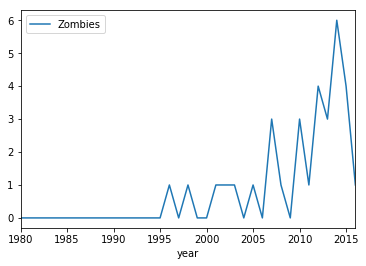

In [67]:
year_data.plot( y = 'Zombies')

In [68]:
year_data.columns

Index([u'Abstract Strategy', u'Action / Dexterity', u'Adventure',
       u'Age of Reason', u'American Civil War', u'American Indian Wars',
       u'American Revolutionary War', u'American West', u'Ancient', u'Animals',
       u'Arabian', u'Aviation / Flight', u'Bluffing', u'Book', u'Card Game',
       u'Children's Game', u'City Building', u'Civil War', u'Civilization',
       u'Collectible Components', u'Comic Book / Strip', u'Deduction', u'Dice',
       u'Economic', u'Educational', u'Electronic', u'Environmental',
       u'Expansion for Base-game', u'Exploration', u'Fantasy', u'Farming',
       u'Fighting', u'Game System', u'Horror', u'Humor',
       u'Industry / Manufacturing', u'Mafia', u'Math', u'Mature / Adult',
       u'Maze', u'Medical', u'Medieval', u'Memory', u'Miniatures',
       u'Modern Warfare', u'Movies / TV / Radio theme', u'Murder/Mystery',
       u'Mythology', u'Napoleonic', u'Nautical', u'Negotiation',
       u'Novel-based', u'Number', u'Party Game', u'Pirates', u'Pol

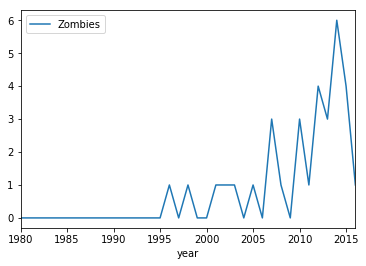

In [107]:
year_data.plot( y = 'Zombies')

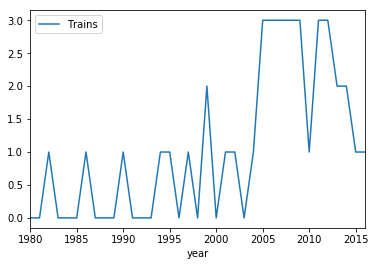

In [103]:
year_data.plot( y = 'Trains')

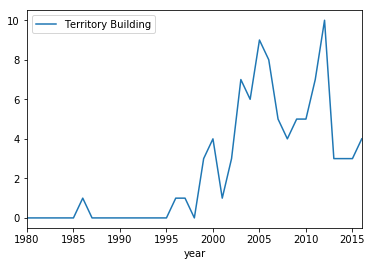

In [102]:
year_data.plot( y = 'Territory Building')

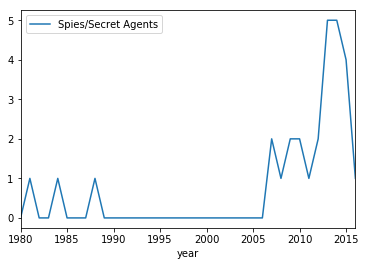

In [101]:
year_data.plot( y = 'Spies/Secret Agents')

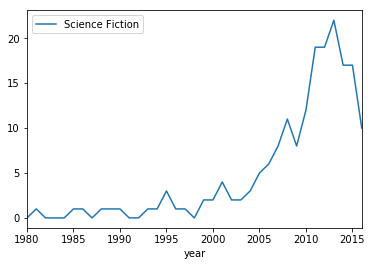

In [100]:
year_data.plot( y = 'Science Fiction')

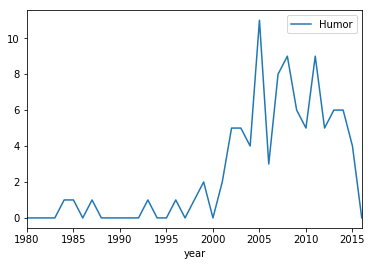

In [97]:
year_data.plot( y = 'Humor')

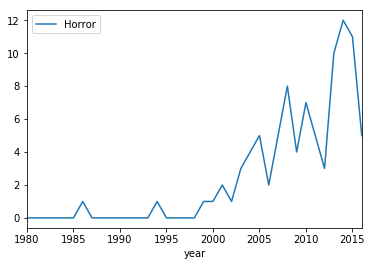

In [96]:
year_data.plot( y = 'Horror')

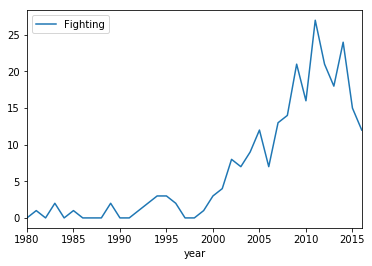

In [95]:
year_data.plot( y = 'Fighting')

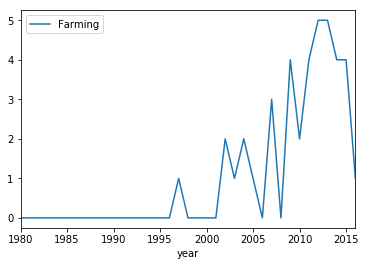

In [94]:
year_data.plot( y = 'Farming')

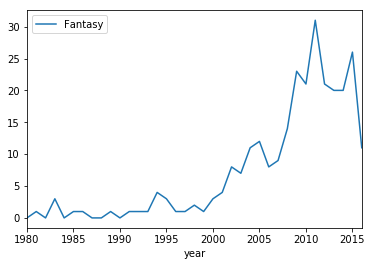

In [93]:
year_data.plot( y = 'Fantasy')

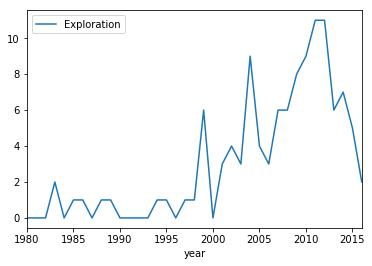

In [92]:
year_data.plot( y = 'Exploration')

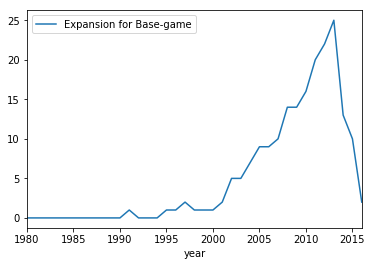

In [91]:
year_data.plot( y = 'Expansion for Base-game')

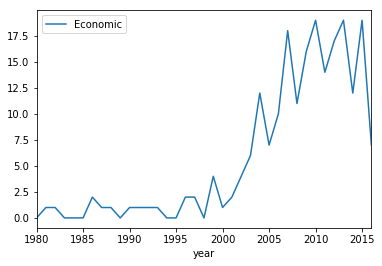

In [88]:
year_data.plot( y = 'Economic')

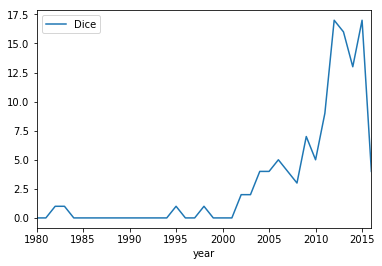

In [87]:
year_data.plot( y = 'Dice')

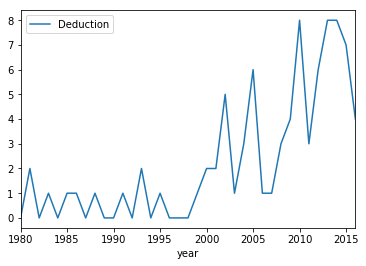

In [86]:
year_data.plot( y = 'Deduction')

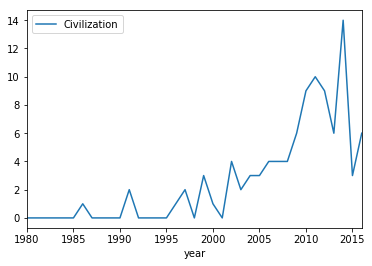

In [84]:
year_data.plot( y = 'Civilization')

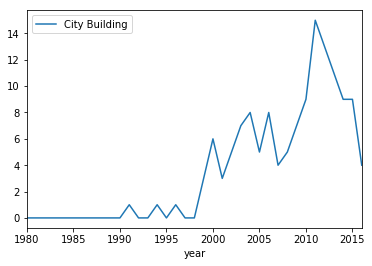

In [82]:
year_data.plot( y = 'City Building')

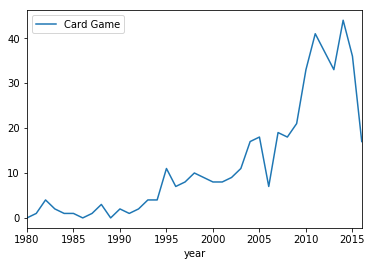

In [81]:
year_data.plot( y = 'Card Game')

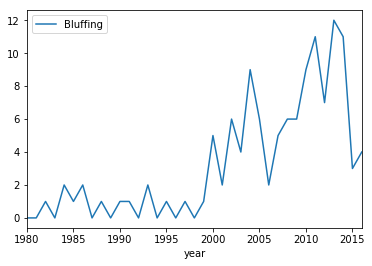

In [79]:
year_data.plot( y = 'Bluffing')

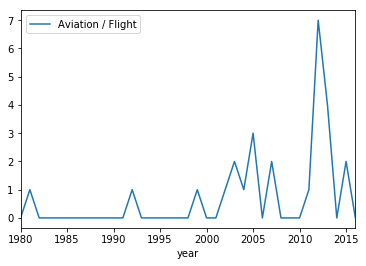

In [78]:
year_data.plot( y = 'Aviation / Flight')

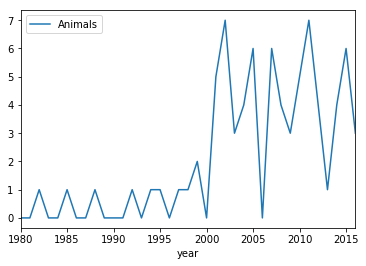

In [76]:
year_data.plot( y = 'Animals')

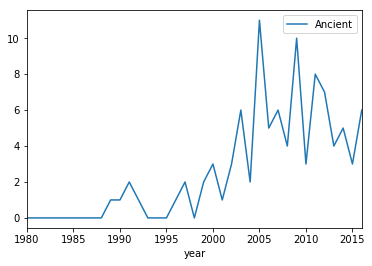

In [75]:
year_data.plot( y = 'Ancient')

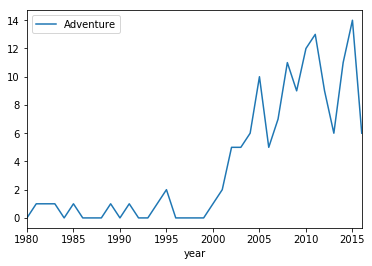

In [71]:
year_data.plot( y = 'Adventure')

In [58]:
df_total_plot = final_data_df.groupby('year').sum()
df_total_plot = df_total_plot.drop([2016])
df_total_plot 

,year_total
year,
1980,0.0
1981,27.0
1982,16.0
1983,23.0
1984,8.0
1985,16.0
1986,34.0
1987,8.0
1988,18.0


In [109]:
year_data=year_data.reset_index()

In [110]:
df_total_plot=df_total_plot.reset_index()

In [124]:
all_data_for_plot = pd.merge(year_data, df_total_plot, on='year')

In [125]:
all_data_for_plot.columns

Index([u'year', u'Abstract Strategy', u'Action / Dexterity', u'Adventure',
       u'Age of Reason', u'American Civil War', u'American Indian Wars',
       u'American Revolutionary War', u'American West', u'Ancient', u'Animals',
       u'Arabian', u'Aviation / Flight', u'Bluffing', u'Book', u'Card Game',
       u'Children's Game', u'City Building', u'Civil War', u'Civilization',
       u'Collectible Components', u'Comic Book / Strip', u'Deduction', u'Dice',
       u'Economic', u'Educational', u'Electronic', u'Environmental',
       u'Expansion for Base-game', u'Exploration', u'Fantasy', u'Farming',
       u'Fighting', u'Game System', u'Horror', u'Humor',
       u'Industry / Manufacturing', u'Mafia', u'Math', u'Mature / Adult',
       u'Maze', u'Medical', u'Medieval', u'Memory', u'Miniatures',
       u'Modern Warfare', u'Movies / TV / Radio theme', u'Murder/Mystery',
       u'Mythology', u'Napoleonic', u'Nautical', u'Negotiation',
       u'Novel-based', u'Number', u'Party Game', u'Pirate

In [177]:
data_plot = all_data_for_plot.drop([ 'Abstract Strategy','American Revolutionary War',  'Action / Dexterity','American Indian Wars',  'Age of Reason', 'American Civil War', u'Ancient', u'Animals',\
       u'Arabian', u'Aviation / Flight', u'Book', \
       u"Children's Game", u'Civil War', u'Civilization',\
       u'Collectible Components', u'Comic Book / Strip', u'Deduction', u'Dice',\
       u'Economic', u'Educational', u'Electronic', u'Environmental',\
       u'Farming',\
        u'Game System', \
       u'Industry / Manufacturing', u'Mafia', u'Math', u'Mature / Adult',\
       u'Maze', u'Medical', u'Medieval', u'Memory', u'Miniatures',\
       u'Modern Warfare', u'Movies / TV / Radio theme', u'Murder/Mystery',\
       u'Mythology', u'Napoleonic', u'Nautical', u'Negotiation',\
       u'Novel-based', u'Number', u'Party Game', u'Pirates', u'Political',\
       u'Post-Napoleonic', u'Prehistoric', u'Print & Play', u'Puzzle',\
       u'Racing', u'Real-time', u'Religious', u'Renaissance',\
       u'Spies/Secret Agents','Bluffing','Humor',\
       u'Sports', u'Territory Building', u'Trains', u'Transportation',\
       u'Travel', u'Trivia', u'Video Game Theme', u'Vietnam War', u'Wargame',\
        u'World War I', u"World War II",'Word Game','American West','Fighting','City Building','Space Exploration'],axis = 1)

In [178]:
data_plot = data_plot.set_index('year')
data_plot = data_plot.drop(2015)
data_plot

,Adventure,Card Game,Expansion for Base-game,Exploration,Fantasy,Horror,Science Fiction,Zombies,year_total
year,,,,,,,,,
1980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,27.0
1982,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
1983,1.0,2.0,0.0,2.0,3.0,0.0,0.0,0.0,23.0
1984,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1985,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,16.0
1986,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,34.0
1987,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1988,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,18.0


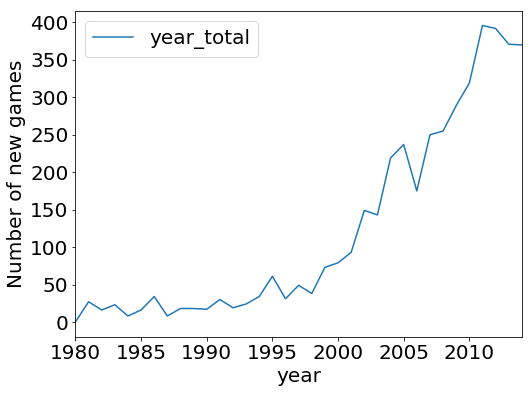

In [179]:

data_plot.plot(y = 'year_total', figsize=(8,6), fontsize = 20)
plt.legend(
   loc='best',
   ncol=1,
   fontsize=20)
plt.xlabel('year', fontsize=20)
plt.ylabel('Number of new games', fontsize=20)

In [180]:
data_plot= data_plot.drop('year_total', axis=1)

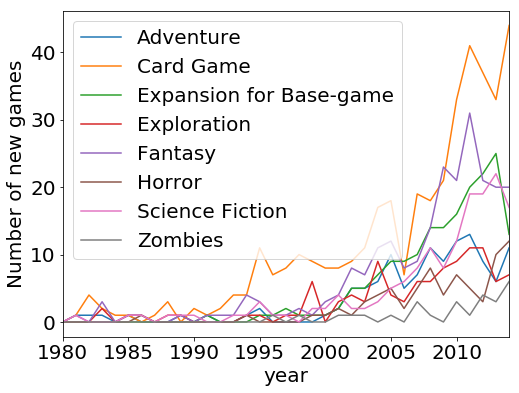

In [181]:
data_plot.plot(figsize=(8,6), fontsize = 20)
plt.legend(
   loc='best',
   ncol=1,
   fontsize=20)
plt.xlabel('year', fontsize=20)
plt.ylabel('Number of new games', fontsize=20)

In [75]:
df_attributes = df_games_attributes.set_index([u'name', u'year_released'])['attributes'].apply(pd.Series).stack()
df_attributes = df_attributes.reset_index()
df_attributes.columns = ['name','year_released','attributes_num','attributes']
df_attributes

,name,year_released,attributes_num,attributes
0,Catan,1995,0,Dice Rolling
1,Catan,1995,1,Hand Management
2,Catan,1995,2,Modular Board
3,Catan,1995,3,Route/Network Building
4,Catan,1995,4,Trading
5,Carcassonne,2000,0,Area Control / Area Influence
6,Carcassonne,2000,1,Tile Placement
7,Pandemic,2008,0,Action Point Allowance System
8,Pandemic,2008,1,Co-operative Play
9,Pandemic,2008,2,Hand Management


In [77]:
df_attributes = df_attributes[df_attributes['year_released']>1980]

In [78]:
df_attributes.groupby(['attributes','year_released']).count()

name  attributes_num
attributes                    year_released                      
Acting                        1998              1               1
                              1999              1               1
                              2004              1               1
                              2005              2               2
                              2008              1               1
                              2009              1               1
                              2010              1               1
                              2012              1               1
                              2013              1               1
                              2016              1               1
Action / Movement Programming 1982              1               1
                              1994              1               1
                              2000              1               1
                              2002              3               3
                              2004              2               2
                              2005              2               2
                              2006              1               1
                              2007              1               1
                              2008              1               1
                              2009              3               3
                              2010              3               3
                              2012              9               9
                              2013              8               8
                              2014              3               3
                              2015              4               4
                              2016              2               2
                              2017              1               1
Action Point Allowance System 1982              1               1
                              1983              1               1
                              1989              2               2
...                                           ...             ...
Voting                        2001              1               1
                              2004              2               2
                              2005              2               2
                              2006              3               3
                              2007              2               2
                              2008              3               3
                              2009              2               2
                              2010              3               3
                              2011              5               5
                              2012              4               4
                              2013              4               4
                              2014              3               3
                              2015              4               4
                              2016              3               3
Worker Placement              2000              1               1
                              2002              1               1
                              2004              1               1
                              2005              2               2
                              2006              2               2
                              2007              7               7
                              2008              7               7
                              2009             10              10
                              2010              8               8
                              2011             16              16
                              2012             16              16
                              2013             19              19
                              2014             12              12
                              2015             17              17
                   